In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

In [10]:
df = pd.read_csv('D:/machine learning/py-master/py-master/ML/9_decision_tree/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [11]:
x = df[['company','job','degree']]
x.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [13]:
y = df[['salary_more_then_100k']]




,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [14]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [15]:
x['n_company'] = le_company.fit_transform(x['company'])
x['n_job'] = le_company.fit_transform(x['job'])
x['n_degree'] = le_company.fit_transform(x['degree'])

In [16]:
x.head()

,company,job,degree,n_company,n_job,n_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [17]:
final_x = x.drop(['company','job','degree'],axis = 'columns') 
final_x

,n_company,n_job,n_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [18]:
from sklearn import model_selection

In [32]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(final_x,y, test_size = 0.2, random_state=10)

In [33]:
x_train.shape

(12, 3)

In [34]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
model.score(x_test,y_test)

0.75

In [36]:
y_test

,salary_more_then_100k
5,1
3,1
14,1
7,0


In [37]:
y_predicted = model.predict(x_test)
y_predicted

array([0, 1, 1, 0], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [42]:
cmd_obj = ConfusionMatrixDisplay(cm)

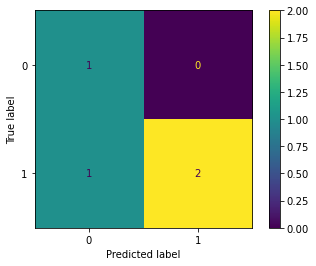

In [43]:
cmd_obj.plot()